# **HOME CREDIT INDONESIA**

## **Konteks**
PT Home Credit Indonesia (HCI) merupakan perusahaan pembiayaan yang memberikan layanan pembiayaan bagi pelanggan yang berbelanja secara online maupun offline. Perusahaan ini menyediakan pembiayaan di toko (pembiayaan non-tunai langsung di tempat) untuk konsumen yang ingin membeli produk-produk seperti alat rumah tangga, alat-alat elektronik, handphone, dan furnitur.

## **Permasalahan**
Sebagai perusahaan yang menyediakan layanan pembiayaan bagi pelanggan dalam bentuk pinjaman uang, tentu saja HCI perlu melakukan konfirmasi dan seleksi terlebih dahulu terhadap para pelanggannya. Masalah yang dihadapi oleh HCI saat ini adalah sulitnya untuk dapat memprediksi apakah seorang pelanggan layak diberikan pinjaman atau tidak karena masih banyak pelanggan yang mampu melunasi pinjamannya namun ajuan pinjamannya tidak disetujui oleh perusahaan.

## **Kebutuhan Dataset**
Dataset yang diperlukan untuk dapat membuat sebuah model klasifikasi dari permasalahan diatas yaitu application_train.csv dan application_test.csv yang mana memuat informasi pribadi tentang pelanggan. Kedua dataset ini akan digabung dan ditambahkan beberapa feature dari previous_application.csv seperti name_contract_status yang akan menjadi target utama dalam pemodelan ini. Sehingga dapat disimpulkan bahwa model ini akan memprediksi target yakni:

* 1: Ajuan pinjaman pelanggan disetujui (name_contract_status=approved)
* 0: Ajuan pinjaman pelanggan ditolak

## **Target/Goal**
Dari deskripsi permasalahan diatas maka target atau goals dari permodelan ini adalah memberikan HCI kemampuan dalam memprediksi pelanggannya dalam hal pemberian pinjaman dilihat dari apakah pelanggan tersebut nanti dapat melunasi pinjamannya atau tidak. Tentunya hal tersebut berhubungan dengan Credit Score dari pelanggan tersebut sehingga goals kedua nya adalah mengetahui faktor apa saja yang mempengaruhi kemampuan pelanggan dalam melunasi pinjamannya (Top 10 Feature).

## **Define Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
test = pd.read_csv('D:/Belajar DS/Rakamin VIX/Week 4 FP/application_test.csv')
train = pd.read_csv('D:/Belajar DS/Rakamin VIX/Week 4 FP/application_train.csv')

df = train.merge(test, how='left')

# Change columns name to lowercase
df.columns = df.columns.str.lower()
df.sample(5)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
93537,208618,0,Cash loans,F,N,N,0,315000.0,1575000.0,64278.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
242384,380590,0,Cash loans,F,N,Y,0,180000.0,225000.0,23625.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
199190,330932,0,Cash loans,M,N,N,0,76500.0,163201.5,12330.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
70329,181581,0,Cash loans,M,N,N,0,121500.0,585000.0,31864.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
62573,172573,1,Cash loans,F,N,Y,1,135000.0,675000.0,24930.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Load dataset that contains target

In [3]:
df_target= pd.read_csv('D:/Belajar DS/Rakamin VIX/Week 4 FP/previous_application.csv')
df_target.columns = df_target.columns.str.lower()
df_target.head()

,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,...,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Define dataframe so df only contain target (name_contract_status) and merge properties (sk_id_curr)
df_target=df_target[['sk_id_curr','name_contract_status']]

### Merge Dataframe

In [5]:
# Merge fataframe
df_new=df_target.merge(df,
               left_on='sk_id_curr',
               right_on='sk_id_curr',
               how='right')

In [6]:
# Mengganti nama kolom target menjadi customer_difficult karena nama kolom target akan mencakup hasil OHE name_contract_status_type = approved
df_new.rename(columns = {'target':'customer_difficult'}, inplace = True)
df_new.sample(5)

,sk_id_curr,name_contract_status,customer_difficult,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
766409,291799,Approved,0,Cash loans,F,N,Y,0,180000.0,1113840.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0
304036,176024,Approved,0,Cash loans,F,N,Y,0,112500.0,169614.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
1113324,377562,Refused,0,Cash loans,M,Y,Y,0,225000.0,545040.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
929217,332131,Approved,0,Cash loans,F,N,N,0,99000.0,490495.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
964095,340814,Approved,0,Cash loans,F,N,Y,0,270000.0,323460.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


### Feature Encoding (OHE)

Karena diawal sudah ditetapkan bahwa tujuan dari permodelan ini adalah untuk memprediksi apakah ajuan pinjaman seorang pelanggan dapat diterima atau tidak (name_contract_status=approved) maka perlu dilakukan Feature Encoding berupa OHE. Hal ini dilakukan karena kita hanya perlu feature name_contract_status berisi value approved atau tidak (1 / 0).

In [7]:
# Feature Encoding Target (OHE)
contract_status=pd.get_dummies(df_new['name_contract_status'], prefix='Status')
df_new=pd.concat([df_new,contract_status], axis=1)

In [8]:
df_new['Status_Approved'].value_counts()

1    886099
0    544056
Name: Status_Approved, dtype: int64

In [9]:
# Menetapkan target model
df_new.rename(columns = {'Status_Approved':'target'}, inplace = True)
df_new['target'].value_counts()

1    886099
0    544056
Name: target, dtype: int64

## **EDA**

In [10]:
for col in df_new.columns:
    print(col)

sk_id_curr
name_contract_status
customer_difficult
name_contract_type
code_gender
flag_own_car
flag_own_realty
cnt_children
amt_income_total
amt_credit
amt_annuity
amt_goods_price
name_type_suite
name_income_type
name_education_type
name_family_status
name_housing_type
region_population_relative
days_birth
days_employed
days_registration
days_id_publish
own_car_age
flag_mobil
flag_emp_phone
flag_work_phone
flag_cont_mobile
flag_phone
flag_email
occupation_type
cnt_fam_members
region_rating_client
region_rating_client_w_city
weekday_appr_process_start
hour_appr_process_start
reg_region_not_live_region
reg_region_not_work_region
live_region_not_work_region
reg_city_not_live_city
reg_city_not_work_city
live_city_not_work_city
organization_type
ext_source_1
ext_source_2
ext_source_3
apartments_avg
basementarea_avg
years_beginexpluatation_avg
years_build_avg
commonarea_avg
elevators_avg
entrances_avg
floorsmax_avg
floorsmin_avg
landarea_avg
livingapartments_avg
livingarea_avg
nonlivingapart

Karena terdapat banyak column pada dataset yang digunakan (123 kolom) maka untuk memudahkan proses EDA, hanya digunakan kolom kolom yang relevant atau berhubungan jelas dengan target (name_contract_status)

In [11]:
df_new_eda=df_new[['name_contract_status','customer_difficult','name_contract_type','code_gender', 'flag_own_car', 'flag_own_realty',
           'cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price', 'name_type_suite','name_income_type',
            'name_education_type','name_family_status','name_housing_type', 'region_population_relative', 'occupation_type',
            'reg_region_not_live_region','reg_region_not_work_region','live_region_not_work_region','reg_city_not_live_city',
            'reg_city_not_work_city','live_city_not_work_city','organization_type']]
df_new_eda.sample(5)

,name_contract_status,customer_difficult,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,name_housing_type,region_population_relative,occupation_type,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type
576040,Approved,0,Cash loans,F,N,Y,0,202500.0,674635.5,26883.0,...,House / apartment,0.011657,NaN,0,0,0,0,0,0,XNA
557117,Approved,0,Cash loans,F,Y,Y,0,90000.0,835380.0,36927.0,...,House / apartment,0.018850,Sales staff,0,0,0,0,1,1,Business Entity Type 2
214889,Canceled,0,Cash loans,F,N,Y,0,225000.0,512338.5,37413.0,...,House / apartment,0.031329,Laborers,0,0,0,0,0,0,Business Entity Type 3
993770,Approved,0,Cash loans,M,N,N,0,112500.0,342000.0,14431.5,...,House / apartment,0.014520,Laborers,0,0,0,0,0,0,Business Entity Type 3
824855,Approved,0,Cash loans,M,N,Y,1,202500.0,900000.0,46084.5,...,House / apartment,0.010966,Managers,0,0,0,0,0,0,Business Entity Type 3


In [12]:
df_new_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 25 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   name_contract_status         1413701 non-null  object 
 1   customer_difficult           1430155 non-null  int64  
 2   name_contract_type           1430155 non-null  object 
 3   code_gender                  1430155 non-null  object 
 4   flag_own_car                 1430155 non-null  object 
 5   flag_own_realty              1430155 non-null  object 
 6   cnt_children                 1430155 non-null  int64  
 7   amt_income_total             1430155 non-null  float64
 8   amt_credit                   1430155 non-null  float64
 9   amt_annuity                  1430062 non-null  float64
 10  amt_goods_price              1428936 non-null  float64
 11  name_type_suite              1426124 non-null  object 
 12  name_income_type             1430155 non-n

In [13]:
# Membagi data type menjadi numerikal dan kategorikal untuk memudahkan EDA
numerical = [column for column in df_new_eda.columns if (df_new_eda[column].dtype=='int64')|(df_new_eda[column].dtype=='float64')]
categorical = [column for column in df_new_eda.columns if (df_new_eda[column].dtype=='object')]

In [14]:
numerical

['customer_difficult',
 'cnt_children',
 'amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'region_population_relative',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city']

In [15]:
categorical

['name_contract_status',
 'name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'occupation_type',
 'organization_type']

### Univariate Analysis

#### Boxplot for Numerical Feature

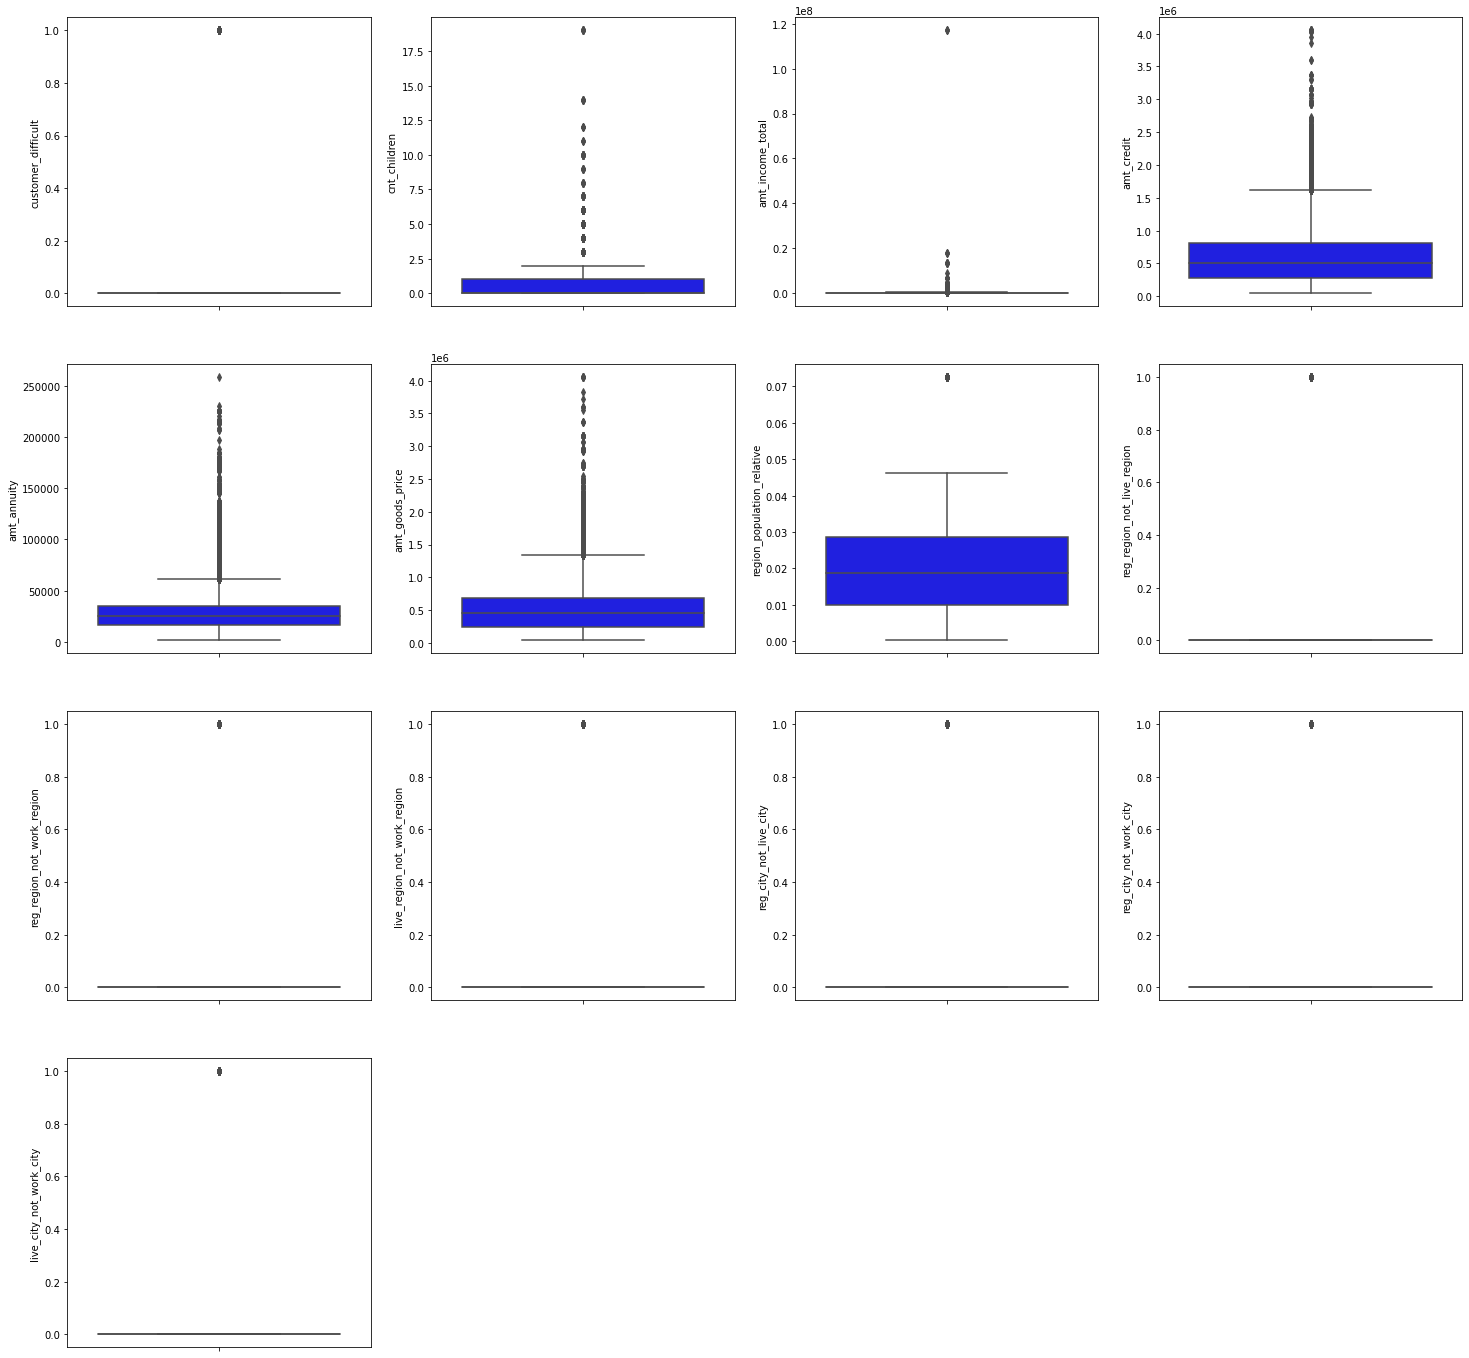

In [16]:
features = numerical
plt.figure(figsize=(25, 50))
for i in range(0, len(features)):
        plt.subplot(8, 4, i+1)
        sns.boxplot(y=df_new_eda[features[i]], color='blue', orient='v')

Intepretasi:
1. Masih terdapat outlier pada beberapa feature seperti feature 'cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price', 'region_population_relative'
2. Feature lainnya terlihat tidak memiliki outlier karena hanya memiliki 2 value yaitu 0 dan 1 seperti 'customer_difficult','reg_region_not_live_region', 'reg_region_not_work_region', 'live_region_not_work_region', 'reg_city_not_live_city', 'reg_city_not_work_city', 'live_city_not_work_city'

#### DisPlot for Numerical Feature

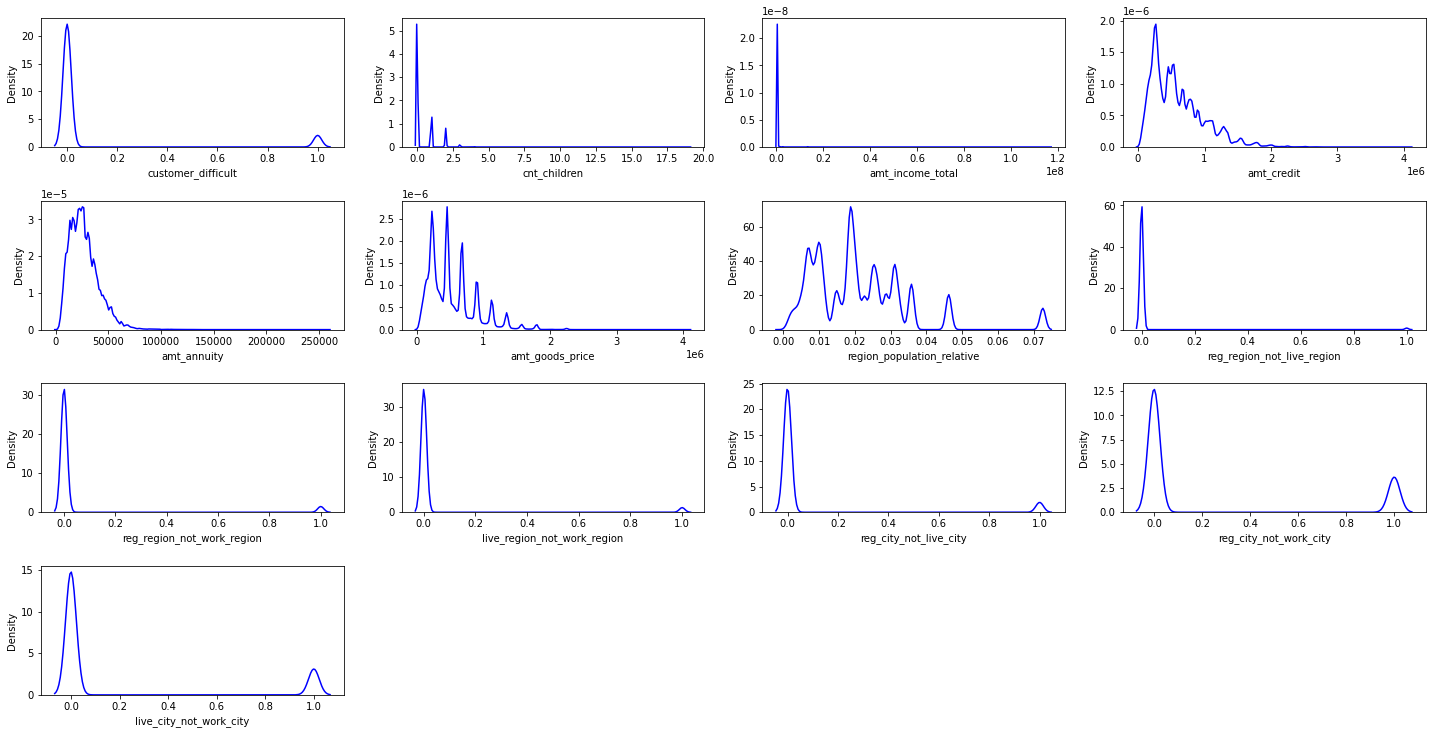

In [17]:
features = numerical
plt.figure(figsize=(20, 20))
for i in range(0, len(features)):
   
        plt.subplot(8, 4, i+1)
        sns.kdeplot(x=df_new_eda[features[i]], color='blue')
        plt.xlabel(features[i])
        plt.tight_layout()

Intepretasi: dari visualisasi distribution plot diatas dapat diihat bahwa kebanyakan feature belum terdistribusi secara normal. feature feature ini cenderung memiliki positive skewness atau Right Skewness

#### Bar Chart for Categorical Feature

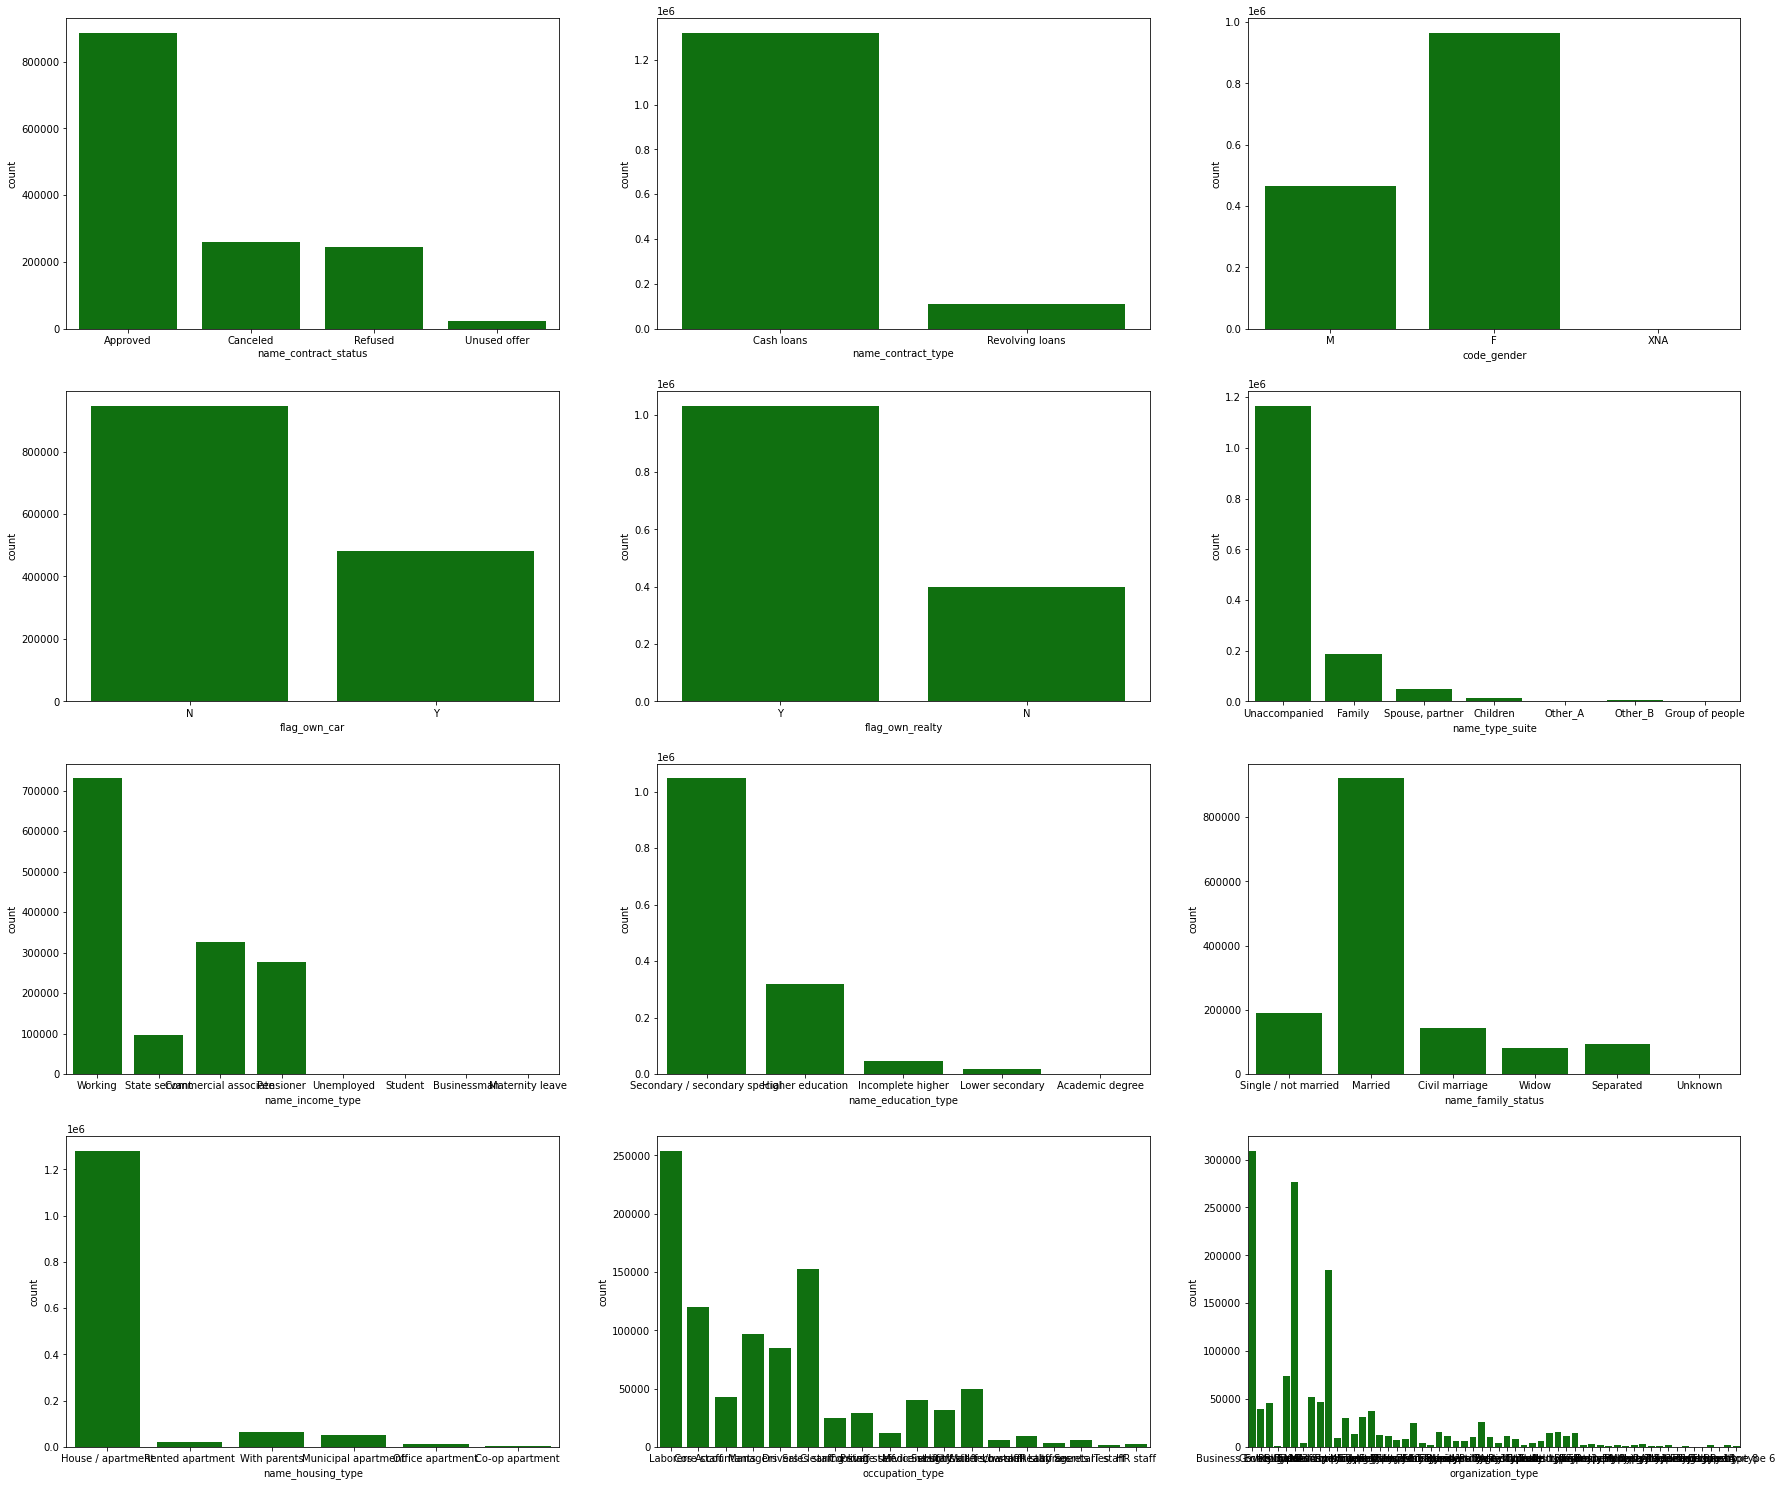

In [18]:
features = categorical
plt.figure(figsize=(30,40))
for i in range(0, len(features)):
        plt.subplot(6,3 , i+1)
        sns.countplot(x=df_new_eda[features[i]], color='green')

Intepretasi:
1. Kebanyakan pelanggan yang mengajukan pinjaman perusahaan (Home Credit Indonesia) akan menyetujui ajuan pinjaman tersebut
2. Tipe pinjaman yang paling diminati oleh pelanggan yaitu tipe cash loans (pinjaman tunai)
3. Peminjam didominasi oleh perempuan
4. Penghasilan para pelanggan utamanya berasal dari pekerjaan
5. Mayoritas pelanggan memiliki tingkat pendidikan akhir Secondary/ Secondary Special (S2)
6. Walaupun pelanggan yang mengajukan pinjaman didominasi oleh pasangan yang sudah menikah, saat mengajukan pinjaman pelanggan mayoritas mengajukannya secara sendirian (Unaccompanied)
7. Kebanyakan pelanggan tidak memiliki mobil namun sudah memiliki rumah / apartemennya sendiri
8. Tipe pekerjaan mayoritas pelanggan yaitu sebagai buruh (Laborers) dengan tipe organisasinya yang masuk dalam kode Business Entity Type 3

### Multivariate Analysis

#### Correlation HeatMap

<AxesSubplot:>

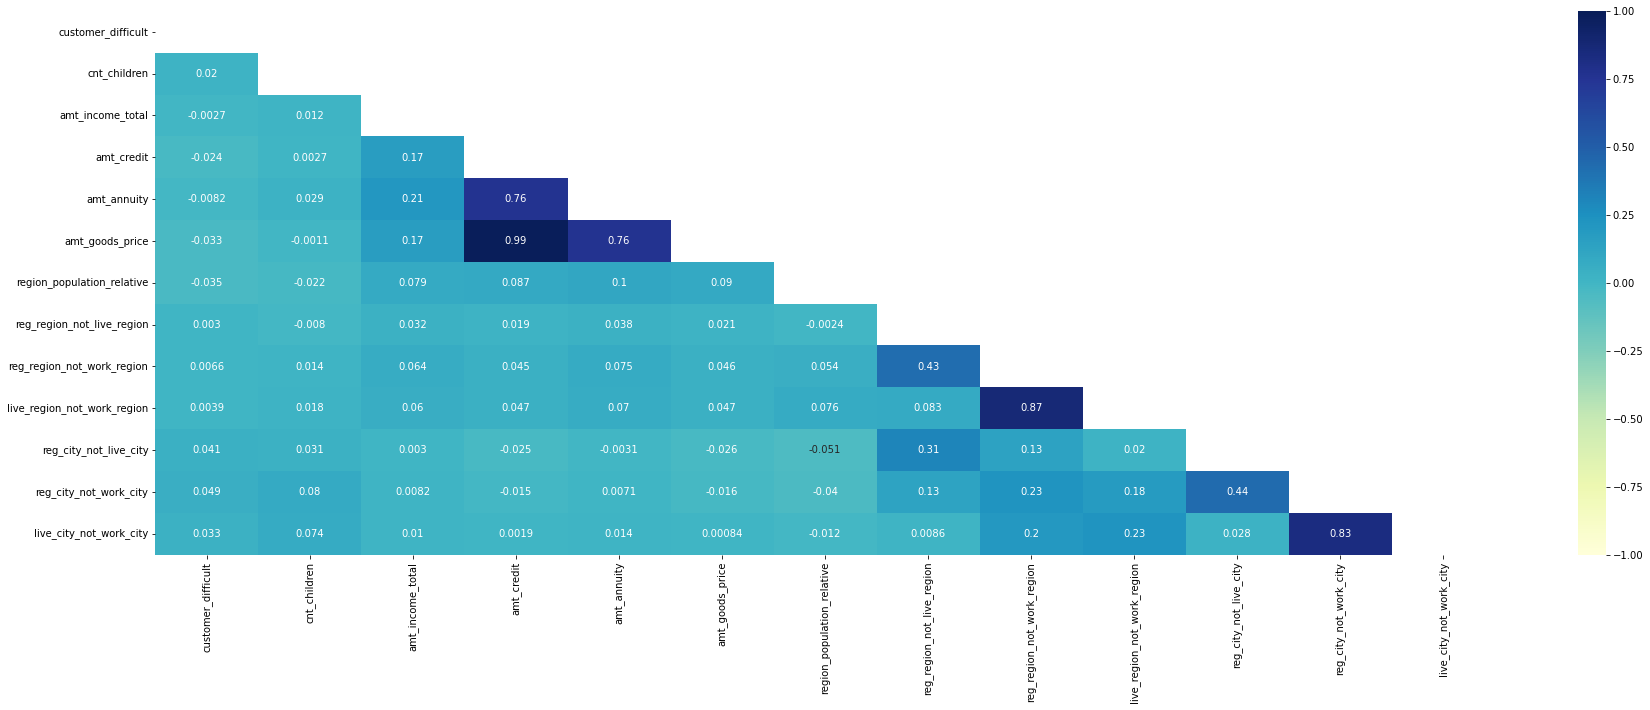

In [19]:
plt.figure(figsize=(30, 10))
mask = np.triu(np.ones_like(df_new_eda.corr(), dtype=np.bool))
sns.heatmap(df_new_eda.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

Intepretasi:
1. Hanya sedikit feature yang memiliki korelasi yang kuat (>0.7) seperti amt_goods_price dengan amt_credit, amt_annuity dengan amt_credit, amt_annuity_dengan amt_good_price, reg_region_not_work_region dengan live_region_not_work_region dan reg_city_not_work_city dengan live_city_not_work_city
2. Kebanyakan feature berkolerasi positif namun dengan nilai korelasi yang sangat kecil


## **EDA, Target, & Business Insight**

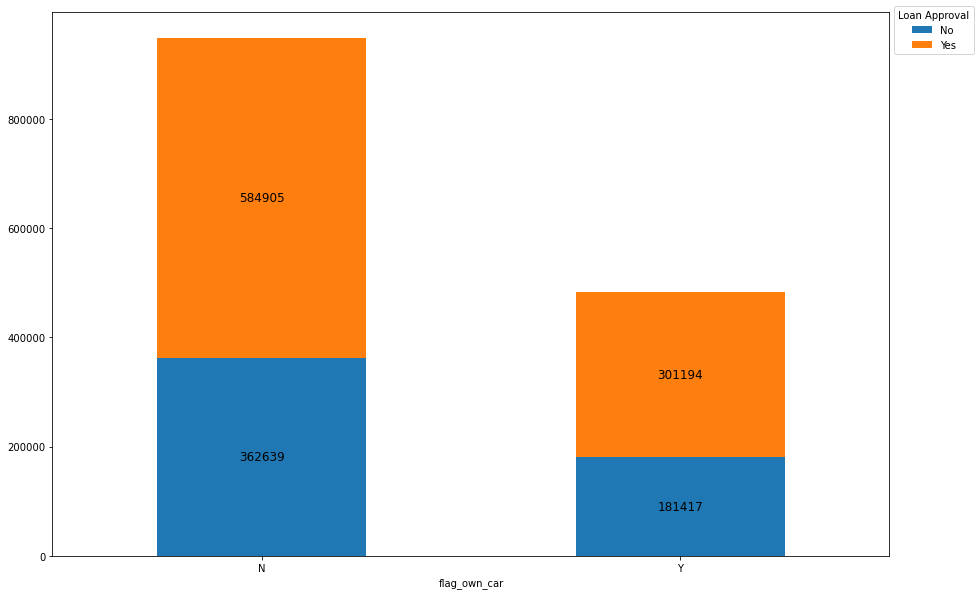

In [20]:
ct = pd.crosstab(df_new_eda.flag_own_car, df_new.target)

ax = ct.plot(kind='bar', stacked=True, rot=0, figsize=(15,10))
ax.legend(title='Loan Approval', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['No','Yes'])


for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=12)


Insight:
Persentase penerimaan pengajuan pinjaman pelanggan yang tidak memiliki mobil pada visualiasi datas terlihat lebih tinggi dibanding dengan pelanggan yang memiliki mobil namun apabila kita bandingkan tingkat penerimaan pinjaman pelanggan dengan tingkat penolakan pinjaman pelanggan pada setiap kategori kepemilikan mobil, maka persentase ajuan pinjaman pelanggan yang memiliki mobil akan diterima akan lebih tinggi sedikit yaitu sebesar 61% sedangkan untuk pelanggan yang tidak memiliki mobil sebesar 62%. 

Business Recommendation:
Karena perbedaan yang tidak terlalu signifikan rekomendasi bisnis yang dapat ditawarkan adalah dengan tetap fokus melakukan campaign terhadap kedua tipe pelanggan seperti untuk pelanggan yang belum memiliki mobil dapat diberi promosi pinjaman untuk memungkinkan pelanggan untuk segera membeli mobil 

In [32]:
584905/(362639+584905)*100

61.728531867649416

In [33]:
301194/(181417+301194)*100

62.409269577361485

### Occupation Type & Loan Approval

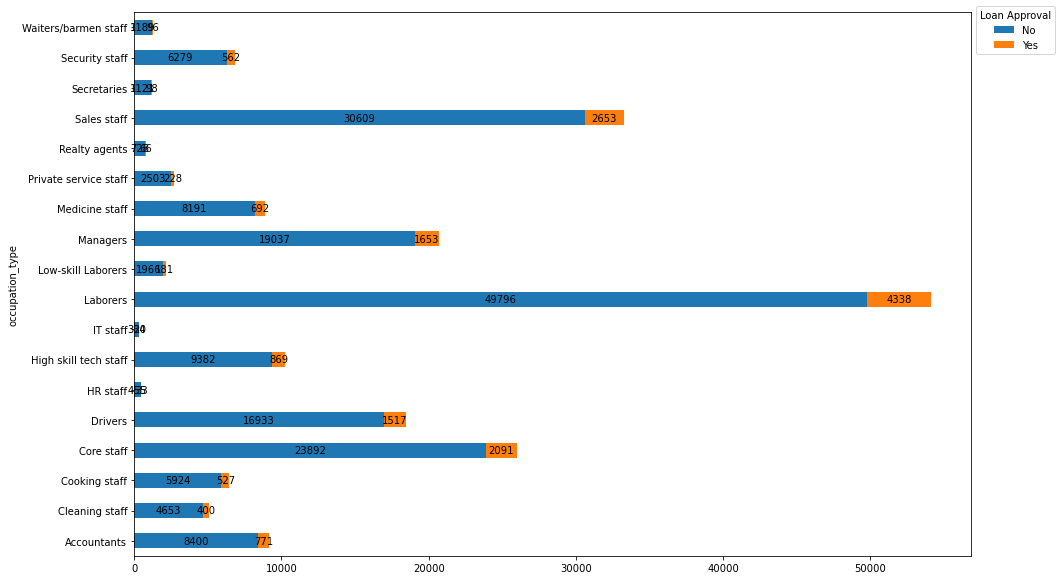

In [23]:
ct = pd.crosstab(df_new.occupation_type, df.target)

ax = ct.plot(kind='barh', rot=0, figsize=(15,10), stacked=True)
ax.legend(title='Loan Approval', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['No','Yes'])


for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=10)

Insight:
Mayoritas pelanggan yang mengajukan pinjaman pada visualisasi diatas adalah Laborers. Persentase ajuan pinjaman dari pelanggan dengan profesi ini akan diterima yaitu hanya sebesar 8% atau hanya 4338 ajuan pinjaman yang diterima dari 49796 pinjaman yang diajukan. 

Business Recommendation.
Walaupun hanya sedikit persentase penerimaan ajuan namun terlihat bahwa banyak masyarakat (target pasar) yang membutuhkan pinjaman memiliki profesi sebagai Laborers. Pihak sales atau campaign dapat berfokus dengan kategori pelanggan ini sehingga dapat meningkatkan persentase ajuan pinjaman pelanggan yang berprofesi sebagai Laborers. 

In [35]:
4338/(49796+4338)*100

8.013448110244948

## **Data Pre-Processing**

### Handle Missing Value

In [36]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [37]:
pd.set_option('display.max_rows', None)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Columns: 127 entries, sk_id_curr to Status_Unused offer
dtypes: float64(65), int64(41), object(17), uint8(4)
memory usage: 1.4+ GB


Setelah melakukan EDA, ditemukan value XNA yang disini saya asumsikan bukan sebagai null value atau missing value namun sebagai data privasi yang pelanggan tidak berkenan untuk isi .Contoh semisal pada kolom gender terdapat XNA yang berarti hal ini mengacu kepada pelanggan yang lebih memilih untuk tidak membicarakannya (Prefer not to Say). Sehingga treatment kedepannya adalah tetap menggunakan data tersebut

In [38]:
df_new['code_gender'].value_counts()

F      964822
M      465278
XNA        55
Name: code_gender, dtype: int64

In [39]:
MissingValue = []
for col in df_new.columns :
    MissingValue.append([col, df_new[col].dtype, df_new[col].isna().sum(), round((df_new[col].isna().sum()/len(df_new[col])) * 100,2),
                    list(df_new[col].drop_duplicates().sample(2).values)]);

df_new_miss = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null_pct', 'sample_value'],
                     data=MissingValue)
df_new_miss.sort_values('null_pct',ascending=False)

,dataFeatures,dataType,null,null_pct,sample_value
63,commonarea_mode,float64,995502,69.61,"[0.0081, 0.1601]"
49,commonarea_avg,float64,995502,69.61,"[0.7688, 0.1062]"
77,commonarea_medi,float64,995502,69.61,"[0.1753, 0.1929]"
85,nonlivingapartments_medi,float64,989835,69.21,"[0.0621, 0.0311]"
57,nonlivingapartments_avg,float64,989835,69.21,"[0.0072, 0.041]"
71,nonlivingapartments_mode,float64,989835,69.21,"[0.1829, 0.144]"
83,livingapartments_medi,float64,974344,68.13,"[0.6396, 0.2907]"
87,fondkapremont_mode,object,974383,68.13,"[reg oper spec account, org spec account]"
55,livingapartments_avg,float64,974344,68.13,"[0.2841, 0.5245]"
69,livingapartments_mode,float64,974344,68.13,"[0.2608, 0.2323]"


In [42]:
len(df_new_miss['dataFeatures'])

127

**Melakukan drop column pada feature yang memiliki persentase null diatas 40%**

In [43]:
df_new.drop(columns=['commonarea_avg','commonarea_mode','commonarea_medi','nonlivingapartments_mode',
                     'nonlivingapartments_avg','nonlivingapartments_medi','fondkapremont_mode',
                     'livingapartments_mode','livingapartments_medi','livingapartments_avg',
                     'floorsmin_mode','floorsmin_medi','floorsmin_avg','own_car_age','years_build_mode',
                     'years_build_avg','years_build_medi','landarea_mode','landarea_avg','landarea_medi',
                     'basementarea_avg','basementarea_medi','basementarea_mode','ext_source_1',
                     'nonlivingarea_mode','nonlivingarea_medi','nonlivingarea_avg','elevators_avg',
                     'elevators_mode','elevators_medi','wallsmaterial_mode','apartments_mode',
                     'apartments_medi','apartments_avg','entrances_mode','entrances_avg','entrances_medi',
                     'livingarea_mode','livingarea_avg','livingarea_medi','housetype_mode','floorsmax_mode',
                     'floorsmax_avg','floorsmax_medi','years_beginexpluatation_avg','years_beginexpluatation_medi',
                     'years_beginexpluatation_mode','totalarea_mode','emergencystate_mode'], inplace=True)

In [44]:
MissingValue = []
for col in df_new.columns :
    MissingValue.append([col, df_new[col].dtype, df_new[col].isna().sum(), round((df_new[col].isna().sum()/len(df_new[col])) * 100,2),
                    list(df_new[col].drop_duplicates().sample(2).values)]);

df_new_miss = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null_pct', 'sample_value'],
                     data=MissingValue)
df_new_miss.sort_values('null_pct',ascending=False)

,dataFeatures,dataType,null,null_pct,sample_value
28,occupation_type,object,462731,32.36,"[Cleaning staff, Private service staff]"
42,ext_source_3,float64,245619,17.17,"[0.1547436312725944, 0.8528284668510541]"
68,amt_req_credit_bureau_hour,float64,165812,11.59,"[3.0, 0.0]"
73,amt_req_credit_bureau_year,float64,165812,11.59,"[0.0, 14.0]"
72,amt_req_credit_bureau_qrt,float64,165812,11.59,"[5.0, 0.0]"
71,amt_req_credit_bureau_mon,float64,165812,11.59,"[15.0, 19.0]"
70,amt_req_credit_bureau_week,float64,165812,11.59,"[1.0, 4.0]"
69,amt_req_credit_bureau_day,float64,165812,11.59,"[1.0, 8.0]"
1,name_contract_status,object,16454,1.15,"[Refused, nan]"
12,name_type_suite,object,4031,0.28,"[Spouse, partner, Group of people]"


**Melakukan drop row pada feature yang persentase nullnya >0 dan <0.99**

In [45]:
df_new.dropna(subset=['amt_annuity','amt_goods_price','ext_source_2','obs_30_cnt_social_circle',
                      'def_30_cnt_social_circle','obs_60_cnt_social_circle','def_60_cnt_social_circle',
                      'name_type_suite'], inplace=True)

In [46]:
MissingValue = []
for col in df_new.columns :
    MissingValue.append([col, df_new[col].dtype, df_new[col].isna().sum(), round((df_new[col].isna().sum()/len(df_new[col])) * 100,2),
                    list(df_new[col].drop_duplicates().sample(1).values)]);

df_new_miss = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null_pct', 'sample_value'],
                     data=MissingValue)
df_new_miss.sort_values('null_pct',ascending=False)

,dataFeatures,dataType,null,null_pct,sample_value
28,occupation_type,object,459657,32.35,[Cleaning staff]
42,ext_source_3,float64,243674,17.15,[0.2418614865234661]
73,amt_req_credit_bureau_year,float64,164597,11.59,[15.0]
72,amt_req_credit_bureau_qrt,float64,164597,11.59,[19.0]
71,amt_req_credit_bureau_mon,float64,164597,11.59,[4.0]
70,amt_req_credit_bureau_week,float64,164597,11.59,[2.0]
69,amt_req_credit_bureau_day,float64,164597,11.59,[2.0]
68,amt_req_credit_bureau_hour,float64,164597,11.59,[1.0]
1,name_contract_status,object,15624,1.10,[nan]
48,flag_document_2,int64,0,0.00,[1]


Mengisi value dengan modus untuk persentase null dari 1%-39%

In [47]:
df_new['occupation_type'].fillna(df_new['occupation_type'].mode()[0], inplace = True)
df_new['ext_source_3'].fillna(df_new['ext_source_3'].mode()[0], inplace = True)
df_new['amt_req_credit_bureau_year'].fillna(df_new['amt_req_credit_bureau_year'].mode()[0], inplace = True)
df_new['amt_req_credit_bureau_qrt'].fillna(df_new['amt_req_credit_bureau_qrt'].mode()[0], inplace = True)
df_new['amt_req_credit_bureau_mon'].fillna(df_new['amt_req_credit_bureau_mon'].mode()[0], inplace = True)
df_new['amt_req_credit_bureau_week'].fillna(df_new['amt_req_credit_bureau_week'].mode()[0], inplace = True)
df_new['amt_req_credit_bureau_day'].fillna(df_new['amt_req_credit_bureau_day'].mode()[0], inplace = True)
df_new['amt_req_credit_bureau_hour'].fillna(df_new['amt_req_credit_bureau_hour'].mode()[0], inplace = True)
df_new['name_contract_status'].fillna(df_new['name_contract_status'].mode()[0], inplace = True)


In [49]:
MissingValue = []
for col in df_new.columns :
    MissingValue.append([col, df_new[col].dtype, df_new[col].isna().sum(), round((df_new[col].isna().sum()/len(df_new[col])) * 100,2),
                    list(df_new[col].drop_duplicates().sample(1).values)]);

df_new_miss = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null_pct', 'sample_value'],
                     data=MissingValue)
df_new_miss.sort_values('null_pct',ascending=False)

,dataFeatures,dataType,null,null_pct,sample_value
0,sk_id_curr,int64,0,0.0,[415660]
49,flag_document_3,int64,0,0.0,[1]
56,flag_document_10,int64,0,0.0,[1]
55,flag_document_9,int64,0,0.0,[0]
54,flag_document_8,int64,0,0.0,[1]
53,flag_document_7,int64,0,0.0,[1]
52,flag_document_6,int64,0,0.0,[1]
51,flag_document_5,int64,0,0.0,[0]
50,flag_document_4,int64,0,0.0,[0]
48,flag_document_2,int64,0,0.0,[1]


In [51]:
df_new.isna().sum()

sk_id_curr                     0
name_contract_status           0
customer_difficult             0
name_contract_type             0
code_gender                    0
flag_own_car                   0
flag_own_realty                0
cnt_children                   0
amt_income_total               0
amt_credit                     0
amt_annuity                    0
amt_goods_price                0
name_type_suite                0
name_income_type               0
name_education_type            0
name_family_status             0
name_housing_type              0
region_population_relative     0
days_birth                     0
days_employed                  0
days_registration              0
days_id_publish                0
flag_mobil                     0
flag_emp_phone                 0
flag_work_phone                0
flag_cont_mobile               0
flag_phone                     0
flag_email                     0
occupation_type                0
cnt_fam_members                0
region_rat

In [53]:
len(df_new_miss['dataFeatures'])

78

### Handle Duplicated data

In [54]:
df_new.duplicated().sum()

888555

In [55]:
df_new.drop_duplicates(inplace=True)

In [56]:
df_new.duplicated().sum()

0

### Handle Outlier

In [57]:
df_clean=df_new.copy()

In [58]:
df_clean.isna().sum()

sk_id_curr                     0
name_contract_status           0
customer_difficult             0
name_contract_type             0
code_gender                    0
flag_own_car                   0
flag_own_realty                0
cnt_children                   0
amt_income_total               0
amt_credit                     0
amt_annuity                    0
amt_goods_price                0
name_type_suite                0
name_income_type               0
name_education_type            0
name_family_status             0
name_housing_type              0
region_population_relative     0
days_birth                     0
days_employed                  0
days_registration              0
days_id_publish                0
flag_mobil                     0
flag_emp_phone                 0
flag_work_phone                0
flag_cont_mobile               0
flag_phone                     0
flag_email                     0
occupation_type                0
cnt_fam_members                0
region_rat

In [59]:
df_clean.sample(5)

,sk_id_curr,name_contract_status,customer_difficult,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,...,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,target,Status_Canceled,Status_Refused,Status_Unused offer
1314451,427498,Approved,0,Cash loans,F,N,N,0,135000.0,1113840.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
438745,209751,Canceled,0,Cash loans,M,N,Y,2,405000.0,1436850.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0,1,0,0
1194448,396517,Approved,0,Cash loans,F,Y,Y,1,157500.0,536917.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
838270,309436,Approved,0,Cash loans,F,N,Y,0,254907.0,139500.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0
807425,301847,Approved,1,Cash loans,M,N,N,0,76500.0,207000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0


In [60]:
list_col = list([column for column in df_clean.columns if (df_clean[column].dtype=='int64')|(df_clean[column].dtype=='float64')])
list_col

['sk_id_curr',
 'customer_difficult',
 'cnt_children',
 'amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'flag_mobil',
 'flag_emp_phone',
 'flag_work_phone',
 'flag_cont_mobile',
 'flag_phone',
 'flag_email',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'hour_appr_process_start',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'ext_source_2',
 'ext_source_3',
 'obs_30_cnt_social_circle',
 'def_30_cnt_social_circle',
 'obs_60_cnt_social_circle',
 'def_60_cnt_social_circle',
 'days_last_phone_change',
 'flag_document_2',
 'flag_document_3',
 'flag_document_4',
 'flag_document_5',
 'flag_document_6',
 'flag_document_7',
 'flag_document_8',
 'flag_document_9',
 'flag_document_10',
 'flag_document_11',
 '

In [61]:
df_new_col = list_col

def det_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')
    
    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    return limit_bawah, limit_atas

for col in df_new_col:
    limit_bawah, limit_atas = det_outliers(df_new[col])
    df_clean = df_clean[(df_clean[col]>= limit_bawah) & (df_clean[col]<= limit_atas)]

IQR: 178000.25
IQR: 0.0
IQR: 1.0
IQR: 90000.0
IQR: 538650.0
IQR: 17874.0
IQR: 441000.0
IQR: 0.018657
IQR: 7248.0
IQR: 2458.0
IQR: 5472.0
IQR: 2574.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 1.0
IQR: 0.0
IQR: 1.0
IQR: 0.0
IQR: 0.0
IQR: 4.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.27278831818490973
IQR: 0.3518048077379717
IQR: 2.0
IQR: 0.0
IQR: 2.0
IQR: 0.0
IQR: 1282.0
IQR: 0.0
IQR: 1.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 0.0
IQR: 2.0


<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='region_population_relative'>

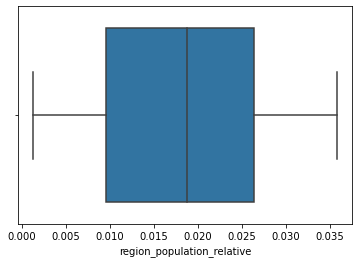

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(x = df_clean['region_population_relative'])

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='cnt_children'>

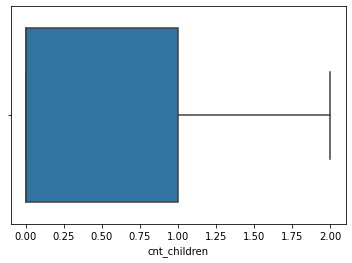

In [63]:
plt.figure(figsize=(6,4))
sns.boxplot(x = df_clean['cnt_children'])

In [64]:
df_clean.isna().sum()

sk_id_curr                     0
name_contract_status           0
customer_difficult             0
name_contract_type             0
code_gender                    0
flag_own_car                   0
flag_own_realty                0
cnt_children                   0
amt_income_total               0
amt_credit                     0
amt_annuity                    0
amt_goods_price                0
name_type_suite                0
name_income_type               0
name_education_type            0
name_family_status             0
name_housing_type              0
region_population_relative     0
days_birth                     0
days_employed                  0
days_registration              0
days_id_publish                0
flag_mobil                     0
flag_emp_phone                 0
flag_work_phone                0
flag_cont_mobile               0
flag_phone                     0
flag_email                     0
occupation_type                0
cnt_fam_members                0
region_rat

## **Feature Selection & Preparation**

In [65]:
for col in df_clean.columns:
    print(col)

sk_id_curr
name_contract_status
customer_difficult
name_contract_type
code_gender
flag_own_car
flag_own_realty
cnt_children
amt_income_total
amt_credit
amt_annuity
amt_goods_price
name_type_suite
name_income_type
name_education_type
name_family_status
name_housing_type
region_population_relative
days_birth
days_employed
days_registration
days_id_publish
flag_mobil
flag_emp_phone
flag_work_phone
flag_cont_mobile
flag_phone
flag_email
occupation_type
cnt_fam_members
region_rating_client
region_rating_client_w_city
weekday_appr_process_start
hour_appr_process_start
reg_region_not_live_region
reg_region_not_work_region
live_region_not_work_region
reg_city_not_live_city
reg_city_not_work_city
live_city_not_work_city
organization_type
ext_source_2
ext_source_3
obs_30_cnt_social_circle
def_30_cnt_social_circle
obs_60_cnt_social_circle
def_60_cnt_social_circle
days_last_phone_change
flag_document_2
flag_document_3
flag_document_4
flag_document_5
flag_document_6
flag_document_7
flag_document_8


Karena banyaknya kolom yang kurang relevant dalam pembuatan model nantinya seperti:
1. flag_document yang hanya merepresentasikan kesediaan dokumen
2. obs_30_cnt_social_circle, obs_60_cnt_social_circle, def_60_cnt_social_circle, def_60_cnt_social_circle
3. name_contract_status karena sudah ada feature hasil OHE
4. ext_source yang alasannya sama denganflag_document
5. Selain target atau status_approved akan dianggap 0 sehingga dapat didrop
6. days_birth karena kita harus menerapkan keadilan pada semua golongan umur
7. amt_req_credit_bureau sepertinya kurang relevan apabila dijadikan feature
8. cnt_children karena sudah ada cnt_fam_member

In [66]:
df_clean.drop(columns=['flag_document_2','flag_document_3','flag_document_4','flag_document_5','flag_document_6','flag_document_7',
                     'flag_document_8','flag_document_9','flag_document_10','flag_document_11','flag_document_12','flag_document_13',
                     'flag_document_14','flag_document_15','flag_document_16','flag_document_17','flag_document_18',
                     'flag_document_19','flag_document_20','flag_document_21'], inplace=True)


In [67]:
df_clean.drop(columns=['obs_30_cnt_social_circle','def_30_cnt_social_circle','obs_60_cnt_social_circle', 'def_60_cnt_social_circle', 
                       'def_60_cnt_social_circle'], inplace=True)

In [68]:
df_clean.drop(columns=['name_contract_status','Status_Canceled','Status_Refused','Status_Unused offer'], inplace=True)

In [69]:
df_clean.drop(columns=['days_birth','ext_source_2','ext_source_3'],inplace=True)

In [70]:
df_clean.drop(columns=['amt_req_credit_bureau_hour','amt_req_credit_bureau_day','amt_req_credit_bureau_week','amt_req_credit_bureau_mon',
                       'amt_req_credit_bureau_qrt','amt_req_credit_bureau_year'],inplace=True)


In [71]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55067 entries, 5 to 1429933
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sk_id_curr                   55067 non-null  int64  
 1   customer_difficult           55067 non-null  int64  
 2   name_contract_type           55067 non-null  object 
 3   code_gender                  55067 non-null  object 
 4   flag_own_car                 55067 non-null  object 
 5   flag_own_realty              55067 non-null  object 
 6   cnt_children                 55067 non-null  int64  
 7   amt_income_total             55067 non-null  float64
 8   amt_credit                   55067 non-null  float64
 9   amt_annuity                  55067 non-null  float64
 10  amt_goods_price              55067 non-null  float64
 11  name_type_suite              55067 non-null  object 
 12  name_income_type             55067 non-null  object 
 13  name_education

In [72]:
df_clean.isna().sum()

sk_id_curr                     0
customer_difficult             0
name_contract_type             0
code_gender                    0
flag_own_car                   0
flag_own_realty                0
cnt_children                   0
amt_income_total               0
amt_credit                     0
amt_annuity                    0
amt_goods_price                0
name_type_suite                0
name_income_type               0
name_education_type            0
name_family_status             0
name_housing_type              0
region_population_relative     0
days_employed                  0
days_registration              0
days_id_publish                0
flag_mobil                     0
flag_emp_phone                 0
flag_work_phone                0
flag_cont_mobile               0
flag_phone                     0
flag_email                     0
occupation_type                0
cnt_fam_members                0
region_rating_client           0
region_rating_client_w_city    0
weekday_ap

### Feature Encoding

melakukan label encoding pada gender, own_car, own_realty, weekday_appr

In [73]:
mapping_gender={
    'F':0,
    'M':1
}
df_clean['code_gender']=df_clean['code_gender'].map(mapping_gender)

mapping_car={
    'N':0,
    'Y':1
}
df_clean['flag_own_car']=df_clean['flag_own_car'].map(mapping_car)

mapping_realty={
    'N':0,
    'Y':1
}
df_clean['flag_own_realty']=df_clean['flag_own_realty'].map(mapping_realty)

mapping_weekday={
    'SUNDAY':0,
    'MONDAY':1,
    'TUESDAT':2,
    'WEDNESDAY':3,
    'THURSDAY':4,
    'FRIDAY':5,
    'SATURDAY':6,
}
df_clean['weekday_appr_process_start']=df_clean['weekday_appr_process_start'].map(mapping_weekday)

melakukan OHE pada contract_type dan occupation_type

In [74]:
contract_types=pd.get_dummies(df_clean['name_contract_type'], prefix='Contract_Type')
df_clean=pd.concat([df_clean,contract_types], axis=1)

occupation_types=pd.get_dummies(df_clean['occupation_type'], prefix='Occupation_Type')
df_clean=pd.concat([df_clean,occupation_types], axis=1)


In [75]:
suite_types=pd.get_dummies(df_clean['name_type_suite'], prefix='Suite_Type')
df_clean=pd.concat([df_clean,suite_types], axis=1)

income_types=pd.get_dummies(df_clean['name_income_type'], prefix='Income_Type')
df_clean=pd.concat([df_clean,income_types], axis=1)

education_types=pd.get_dummies(df_clean['name_education_type'], prefix='Education_Type')
df_clean=pd.concat([df_clean,education_types], axis=1)

family_status=pd.get_dummies(df_clean['name_family_status'], prefix='Family_Status')
df_clean=pd.concat([df_clean,family_status], axis=1)

housing_types=pd.get_dummies(df_clean['name_housing_type'], prefix='Housing_Type')
df_clean=pd.concat([df_clean,housing_types], axis=1)

In [76]:
organization_types=pd.get_dummies(df_clean['organization_type'], prefix='Organization_Type')
df_clean=pd.concat([df_clean,organization_types], axis=1)

In [77]:
#Drop column awal sebelum feature encoding
df_clean.drop(columns=['code_gender','flag_own_car','flag_own_realty','weekday_appr_process_start',
                     'name_contract_type','occupation_type'], inplace=True)

In [78]:
df_clean.drop(columns=['name_type_suite','name_income_type', 'name_education_type','name_family_status', 
                       'name_housing_type'], inplace=True)

In [79]:
df_clean.drop(columns=['organization_type'], inplace=True)

In [81]:
df_clean.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55067 entries, 5 to 1429933
Data columns (total 135 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    sk_id_curr                                    55067 non-null  int64  
 1    customer_difficult                            55067 non-null  int64  
 2    cnt_children                                  55067 non-null  int64  
 3    amt_income_total                              55067 non-null  float64
 4    amt_credit                                    55067 non-null  float64
 5    amt_annuity                                   55067 non-null  float64
 6    amt_goods_price                               55067 non-null  float64
 7    region_population_relative                    55067 non-null  float64
 8    days_employed                                 55067 non-null  int64  
 9    days_registration                             

Karena banyaknya feature yang ada dan nantinya akan berdampak pada proses permodelan maka dilakukan beberapa feature engineering dengan menyederhanakan beberapa feature diatas seperti:
1. 2 suite_type_other menjadi 1 suite_type_other
2. 3 Organization_Type_Business Entity Type menjadi 1 Organization_Type_Business Entity 
3. 13 Organization_Type_Industry menjadi 1 Organization_Type_Industry
4. 7 Organization_Type_Trade menjadi 1 Organization_Type_Trade
5. 4 Organization_Type_Transport: menjdi 1 Organization_Type_Transport

In [82]:
df_clean.drop(columns=['Suite_Type_Other_B'], inplace=True)

In [83]:
df_clean.drop(columns=['Organization_Type_Business Entity Type 2','Organization_Type_Business Entity Type 3'], inplace=True)

In [84]:
df_clean.drop(columns=['Organization_Type_Industry: type 2','Organization_Type_Industry: type 3'], inplace=True)

In [85]:
df_clean.drop(columns=['Organization_Type_Industry: type 4','Organization_Type_Industry: type 5','Organization_Type_Industry: type 6',
                      'Organization_Type_Industry: type 7','Organization_Type_Industry: type 8','Organization_Type_Industry: type 9',
                      'Organization_Type_Industry: type 10','Organization_Type_Industry: type 11','Organization_Type_Industry: type 12',
                      'Organization_Type_Industry: type 13'], inplace=True)

In [86]:
df_clean.drop(columns=['Organization_Type_Trade: type 2','Organization_Type_Trade: type 3','Organization_Type_Trade: type 4',
                      'Organization_Type_Trade: type 5','Organization_Type_Trade: type 6','Organization_Type_Trade: type 7'], inplace=True)

df_clean.drop(columns=['Organization_Type_Transport: type 2','Organization_Type_Transport: type 3','Organization_Type_Transport: type 4'], inplace=True)


In [88]:
len(df_clean.columns)

111

Memberi nama kolom yang tersisa dengan nama sebagai representasi keseluruhan feature yang didrop

In [89]:
df_clean.rename(columns = {'Suite_Type_Other_A':'Suite_Type_Other', 
                           'Organization_Type_Business Entity Type 1':'Organization_Type_Business Entity Type',
                           'Organization_Type_Industry: type 1':'Organization_Type_Industry',
                           'Organization_Type_Trade: type 1':'Organization_Type_Trade',
                           'Organization_Type_Transport: type 1':'Organization_Type_Transport'}, inplace = True)

Terdapat kolom yang memiliki value negatif sehingga akan diubah ke positif

In [90]:
df_clean['days_last_phone_change'] = df_clean['days_last_phone_change'].abs()
df_clean['days_employed'] = df_clean['days_employed'].abs()
df_clean['days_registration'] = df_clean['days_registration'].abs()
df_clean['days_id_publish'] = df_clean['days_id_publish'].abs()

In [91]:
df_clean.describe()

,sk_id_curr,customer_difficult,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_employed,days_registration,...,Organization_Type_Restaurant,Organization_Type_School,Organization_Type_Security,Organization_Type_Security Ministries,Organization_Type_Self-employed,Organization_Type_Services,Organization_Type_Telecom,Organization_Type_Trade,Organization_Type_Transport,Organization_Type_University
count,55067.000000,55067.0,55067.000000,55067.000000,5.506700e+04,55067.000000,5.506700e+04,55067.000000,55067.000000,55067.000000,...,55067.000000,55067.000000,55067.000000,55067.000000,55067.000000,55067.000000,55067.000000,55067.000000,55067.000000,55067.000000
mean,277733.243830,0.0,0.451668,153231.659660,5.279000e+05,24642.592542,4.687261e+05,0.018590,2012.128970,4777.848130,...,0.008281,0.033904,0.009697,0.005757,0.191421,0.007936,0.001870,0.001344,0.000599,0.004685
std,102759.015156,0.0,0.669363,59004.529189,3.152951e+05,11163.397968,2.807943e+05,0.009612,1532.873962,3310.701911,...,0.090622,0.180984,0.097997,0.075654,0.393423,0.088730,0.043209,0.036634,0.024473,0.068289
min,100006.000000,0.0,0.000000,25650.000000,4.500000e+04,2754.000000,4.500000e+04,0.001276,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189200.000000,0.0,0.000000,112500.000000,2.700000e+05,15943.500000,2.295000e+05,0.009630,776.000000,1877.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,276380.000000,0.0,0.000000,135000.000000,4.672575e+05,23773.500000,4.500000e+05,0.018801,1610.000000,4447.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,366629.500000,0.0,1.000000,180000.000000,7.430310e+05,31630.500000,6.750000e+05,0.026392,2939.000000,7245.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456206.000000,0.0,2.000000,337500.000000,1.609272e+06,61326.000000,1.341000e+06,0.035792,6443.000000,15662.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
df_clean.drop(columns=['sk_id_curr'],inplace=True)

In [93]:
df_clean.isna().sum()

customer_difficult                              0
cnt_children                                    0
amt_income_total                                0
amt_credit                                      0
amt_annuity                                     0
amt_goods_price                                 0
region_population_relative                      0
days_employed                                   0
days_registration                               0
days_id_publish                                 0
flag_mobil                                      0
flag_emp_phone                                  0
flag_work_phone                                 0
flag_cont_mobile                                0
flag_phone                                      0
flag_email                                      0
cnt_fam_members                                 0
region_rating_client                            0
region_rating_client_w_city                     0
hour_appr_process_start                         0


## **Modelling + Evaluation**

Feature standarization

In [202]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV



In [203]:
df_real=df_clean.copy()
df_real.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55067 entries, 5 to 1429933
Data columns (total 110 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    customer_difficult                            55067 non-null  int64  
 1    cnt_children                                  55067 non-null  int64  
 2    amt_income_total                              55067 non-null  float64
 3    amt_credit                                    55067 non-null  float64
 4    amt_annuity                                   55067 non-null  float64
 5    amt_goods_price                               55067 non-null  float64
 6    region_population_relative                    55067 non-null  float64
 7    days_employed                                 55067 non-null  int64  
 8    days_registration                             55067 non-null  float64
 9    days_id_publish                               

In [204]:
for col in df_real.columns:
        df_real[col] = MinMaxScaler().fit_transform(df_real[col].values.reshape(len(df_real), 1))

In [205]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [206]:
def eval_classification(model, xtrain, ytrain, xtest, ytest):
    pred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print(key+':', model.get_params()[key])
        
def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form  
    cm_df = pd.DataFrame(cm, index=['Actually Not Approved', 'Actually Approved'],
                 columns=['Predicted Not Approved', 'Predicted Approved'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class');

In [207]:
# Split Feature and Label

x = df_real.drop(columns=['target'], axis=1)
y = df_real['target'] # target / label
print(x.shape)
print(y.shape)

(55067, 109)
(55067,)


In [208]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### **Logistic Regression**

In [209]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

LogisticRegression(solver='liblinear')

In [210]:
eval_classification(lr_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.57
Precision (Test Set): 0.57
Recall (Test Set): 0.95
F1-Score (Test Set): 0.72
AUC: 0.54


In [211]:
print('Train score: ' + str(lr_model.score(x_train, y_train))) #accuracy
print('Test score:' + str(lr_model.score(x_test, y_test))) #accuracy

Train score: 0.5661547242256005
Test score:0.5703044609890442


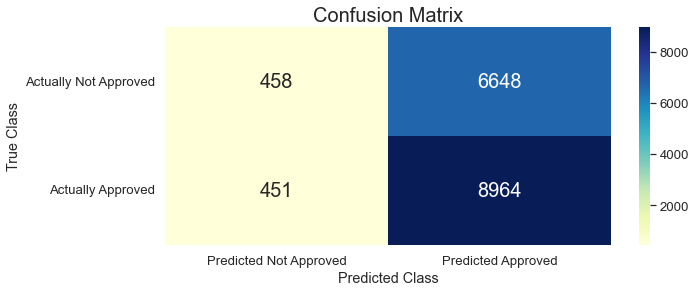

In [212]:
show_cmatrix(y_test, y_pred_lr)

In [213]:
#For Dataframe
recall_lr = recall_score(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
acc_lr_train = lr_model.score(x_train, y_train)

### **KNN**

In [214]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

KNeighborsClassifier()

In [215]:
eval_classification(knn_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.44
Precision (Test Set): 0.51
Recall (Test Set): 0.54
F1-Score (Test Set): 0.52
AUC: 0.41


In [216]:
print('Train score: ' + str(knn_model.score(x_train, y_train))) #accuracy
print('Test score:' + str(knn_model.score(x_test, y_test))) #accuracy

Train score: 0.6564364655217143
Test score:0.44095393741298955


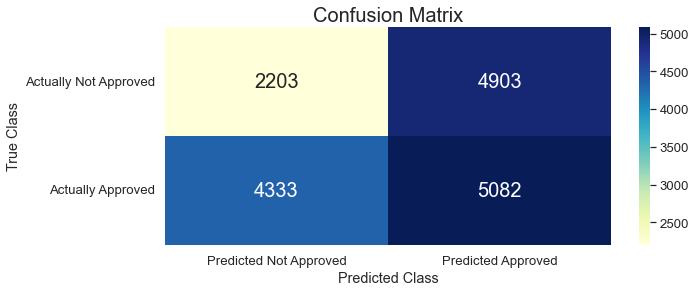

In [217]:
show_cmatrix(y_test, y_pred_knn)

In [218]:
recall_knn = recall_score(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
acc_knn_train = knn_model.score(x_train, y_train)

### **Decision Tree**

In [219]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)

DecisionTreeClassifier()

In [220]:
eval_classification(dt_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.38
Precision (Test Set): 0.44
Recall (Test Set): 0.31
F1-Score (Test Set): 0.36
AUC: 0.32


In [221]:
print('Train score: ' + str(dt_model.score(x_train, y_train))) #accuracy
print('Test score:' + str(dt_model.score(x_test, y_test))) #accuracy

Train score: 0.7712084262958543
Test score:0.3800617396041402


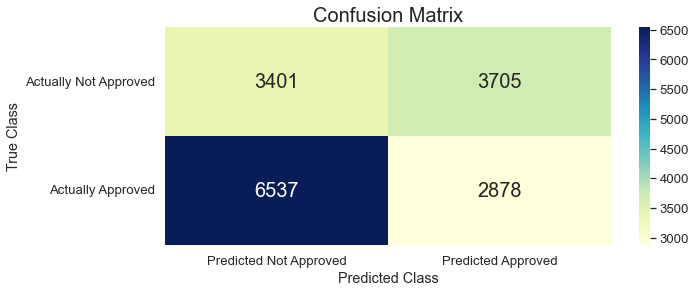

In [222]:
show_cmatrix(y_test, y_pred_dt)

In [223]:
recall_dt = recall_score(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
acc_dt_train = dt_model.score(x_train, y_train)

## **Model Evaluation**

In [224]:
evaluation_summary = {
    'Log Res':[acc_lr, recall_lr, precision_lr, f1_lr],
    'KNN':[acc_knn, recall_knn, precision_knn, f1_knn],
    'Decision Tree':[acc_dt, recall_dt, precision_dt, f1_dt]
}

eva_sum = pd.DataFrame(data = evaluation_summary, index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
eva_sum

,Log Res,KNN,Decision Tree
Accuracy,0.570304,0.440954,0.380062
Recall,0.952098,0.539777,0.305682
Precision,0.574174,0.508963,0.437187
F1 Score,0.716346,0.523918,0.359795


In [225]:
evaluation_summary_train_test = {
    "Train" : [acc_lr_train, acc_knn_train, acc_dt_train],
    "Test": [acc_lr, acc_knn, acc_dt]
}

eva_sum_train_test = pd.DataFrame(data = evaluation_summary_train_test, index = ['Log Res','KNN', 'Decision Tree'])
eva_sum_train_test

,Train,Test
Log Res,0.566155,0.570304
KNN,0.656436,0.440954
Decision Tree,0.771208,0.380062


## **Hyperparameter Tuning**

### **LogReg Tuning**

In [226]:
hyperparameters = { 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                   'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
                   'C' : [100, 10, 1.0, 0.1, 0.01] }

lr_tuned = LogisticRegression()

lr_tuned_model = RandomizedSearchCV(lr_tuned, hyperparameters, cv=5, scoring='recall')
lr_tuned_model.fit(x_train, y_train)
y_pred_lr_tuned = lr_tuned_model.predict(x_test)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='recall')

In [227]:
show_best_hyperparameter(lr_tuned_model.best_estimator_, hyperparameters)

solver: lbfgs
penalty: l2
C: 0.1


In [228]:
eval_classification(lr_tuned_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.57
Precision (Test Set): 0.57
Recall (Test Set): 0.96
F1-Score (Test Set): 0.72
AUC: 0.54


In [229]:
print('Train score: ' + str(lr_tuned_model.score(x_train, y_train))) 
print('Test score:' + str(lr_tuned_model.score(x_test, y_test))) 

Train score: 0.9601208735863742
Test score:0.9582580987785448


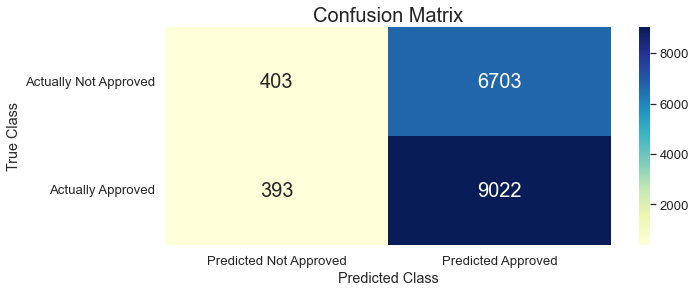

In [230]:
show_cmatrix(y_test, y_pred_lr_tuned)

In [231]:
recall_lr_tuned = recall_score(y_test, y_pred_lr_tuned)
acc_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
precision_lr_tuned = precision_score(y_test, y_pred_lr_tuned)
f1_lr_tuned = f1_score(y_test, y_pred_lr_tuned)
acc_lr_tuned_train = lr_tuned_model.score(x_train, y_train)

### **KNN Tuning**

In [232]:
hyperparameters = {'n_neighbors' : [5,7,9,11,13,15],
                   'weights' : ['uniform','distance'],
                   'metric' : ['minkowski','euclidean','manhattan']
                  }

knn_tuned = KNeighborsClassifier()

knn_tuned_model = RandomizedSearchCV(knn_tuned, hyperparameters, cv=5, scoring='recall')
knn_tuned_model.fit(x_train, y_train)
y_pred_knn_tuned = knn_tuned_model.predict(x_test)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='recall')

In [233]:
show_best_hyperparameter(knn_tuned_model.best_estimator_, hyperparameters)

n_neighbors: 15
weights: uniform
metric: minkowski


In [234]:
eval_classification(knn_tuned_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.50
Precision (Test Set): 0.55
Recall (Test Set): 0.68
F1-Score (Test Set): 0.61
AUC: 0.45


In [235]:
print('Train score: ' + str(knn_tuned_model.score(x_train, y_train))) 
print('Test score:' + str(knn_tuned_model.score(x_test, y_test))) 

Train score: 0.7782610686323886
Test score:0.6846521508231546


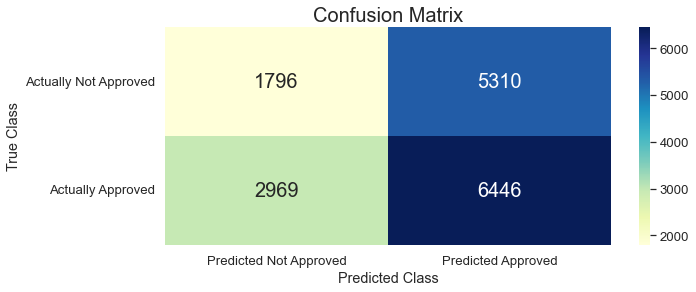

In [236]:
show_cmatrix(y_test, y_pred_knn_tuned)

In [237]:
#for comparison
recall_knn_tuned = recall_score(y_test, y_pred_knn_tuned)
acc_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
precision_knn_tuned = precision_score(y_test, y_pred_knn_tuned)
f1_knn_tuned = f1_score(y_test, y_pred_knn_tuned)
acc_knn_tuned_train = knn_tuned_model.score(x_train, y_train)

### **DT Tuning**

In [249]:
hyperparameters = {'max_depth': [2, 3, 5, 10, 20],
                   'min_samples_leaf': [5, 10, 20, 50, 100],
                   'criterion': ["gini", "entropy"]}

dt_tuned = DecisionTreeClassifier()

dt_tuned_model = RandomizedSearchCV(dt_tuned, hyperparameters, cv=5, scoring='recall')
dt_tuned_model.fit(x_train, y_train)
y_pred_dt_tuned = dt_tuned_model.predict(x_test)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100]},
                   scoring='recall')

In [250]:
show_best_hyperparameter(dt_tuned_model.best_estimator_, hyperparameters)

max_depth: 2
min_samples_leaf: 100
criterion: gini


In [251]:
eval_classification(dt_tuned_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.57
Precision (Test Set): 0.57
Recall (Test Set): 0.98
F1-Score (Test Set): 0.72
AUC: 0.52


In [252]:
print('Train score: ' + str(dt_tuned_model.score(x_train, y_train))) #accuracy
print('Test score:' + str(dt_tuned_model.score(x_test, y_test))) #accuracy

Train score: 0.984707659905682
Test score:0.9841741901221455


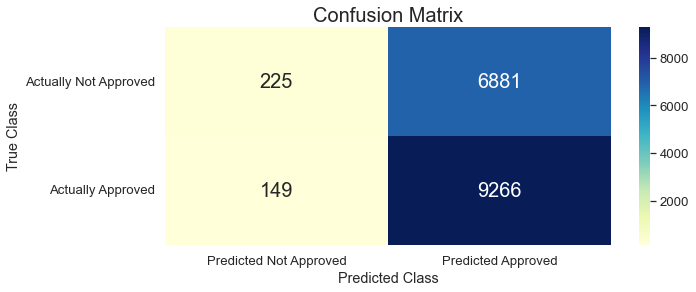

In [253]:
show_cmatrix(y_test, y_pred_dt_tuned)

In [254]:
#for comparison
recall_dt_tuned = recall_score(y_test, y_pred_dt_tuned)
acc_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned)
acc_dt_tuned_train = dt_tuned_model.score(x_train, y_train)

## **Model Evaluation with Hyperparameter Tuning**

In [255]:
evaluation_tuned = {
    'Logistic Regression Tuned': [acc_lr_tuned, recall_lr_tuned, precision_lr_tuned, f1_lr_tuned],
    'KNN Tuned':[acc_knn_tuned, recall_knn_tuned, precision_knn_tuned, f1_knn_tuned],
    'Decision Tree Tuned':[acc_dt_tuned, recall_dt_tuned, precision_dt_tuned, f1_dt_tuned],
   } 

eva_tuned = pd.DataFrame(data = evaluation_tuned, index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
eva_tuned

,Logistic Regression Tuned,KNN Tuned,Decision Tree Tuned
Accuracy,0.570486,0.498880,0.574481
Recall,0.958258,0.684652,0.984174
Precision,0.573736,0.548316,0.573853
F1 Score,0.717741,0.608946,0.724982


In [256]:
evaluation_summary_train_test_tuned = {
    "Train" : [acc_lr_tuned_train, acc_knn_tuned_train, acc_dt_tuned_train],
    "Test": [acc_lr_tuned, acc_knn_tuned, acc_dt_tuned]
}

eva_sum_train_test_tuned = pd.DataFrame(data = evaluation_summary_train_test_tuned, index = ['Log Res','KNN', 'Decision Tree'])
eva_sum_train_test_tuned

,Train,Test
Log Res,0.960121,0.570486
KNN,0.778261,0.498880
Decision Tree,0.984708,0.574481


## **Feature Importance**

In [246]:
dt_tuned = DecisionTreeClassifier()

dtf=dt_tuned.fit(x_train, y_train)
dtf.feature_importances_
len(dtf.feature_importances_)

df_real.reset_index(drop=True, inplace=True)
df_feature_importance = pd.DataFrame({'Features_Name':x.columns, 'Features_Importances':dtf.feature_importances_}
                                    ).sort_values('Features_Importances', ascending=False).reset_index(drop=True)

array([0.00000000e+00, 9.37492096e-03, 5.00398621e-02, 6.32787441e-02,
       8.26405364e-02, 4.90739638e-02, 7.08958048e-02, 9.94916109e-02,
       9.63855340e-02, 9.91341259e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.83885917e-03, 0.00000000e+00,
       1.22872128e-02, 0.00000000e+00, 0.00000000e+00, 5.04067918e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.02081447e-01, 3.93416788e-03,
       1.12740190e-03, 3.73172043e-03, 1.83151953e-03, 3.29142014e-03,
       7.52302660e-03, 5.05884610e-03, 2.08981263e-04, 4.19112149e-03,
       1.60700664e-04, 8.48422689e-03, 8.27449051e-04, 3.79599252e-03,
       2.02973826e-03, 1.62440048e-03, 6.78645454e-04, 9.26538584e-03,
       2.46125318e-04, 2.92403426e-03, 3.32959217e-04, 8.95811839e-04,
       5.96334186e-03, 0.00000000e+00, 8.99803877e-05, 3.65733923e-03,
       5.82044501e-03, 0.00000000e+00, 7.52722751e-03, 0.00000000e+00,
      

109

In [247]:
df_feature_importance

,Features_Name,Features_Importances
0,days_last_phone_change,0.102081
1,days_employed,0.099492
2,days_id_publish,0.099134
3,days_registration,0.096386
4,amt_annuity,0.082641
5,region_population_relative,0.070896
6,amt_credit,0.063279
7,hour_appr_process_start,0.050407
8,amt_income_total,0.050040
9,amt_goods_price,0.049074


<BarContainer object of 10 artists>

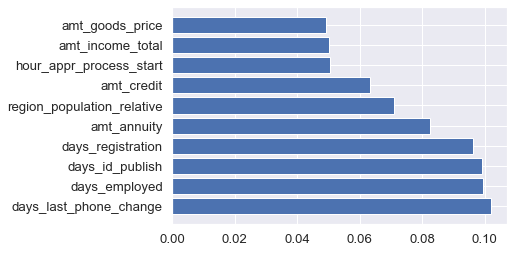

In [248]:
plt.barh(df_feature_importance.Features_Name.head(10),df_feature_importance.Features_Importances.head(10))

## **Modelling with Top 10 Features**

In [257]:
x = df_real[['days_last_phone_change','days_employed','days_id_publish', 	
'days_registration','amt_annuity','region_population_relative', 	
'amt_credit','hour_appr_process_start','amt_income_total','amt_goods_price',]]

y = df_real['target'] 


from sklearn.model_selection import train_test_split 
x_train_fi, x_test_fi, y_train_fi, y_test_fi = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [260]:
dt_model = DecisionTreeClassifier(max_depth=2,min_samples_leaf=100,criterion='gini')
dt_model.fit(x_train_fi, y_train_fi)
y_pred_dt = dt_model.predict(x_test_fi)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=100)

In [261]:
eval_classification(dt_model, x_train_fi, y_train_fi, x_test_fi, y_test_fi)

Accuracy (Test Set): 0.57
Precision (Test Set): 0.57
Recall (Test Set): 0.98
F1-Score (Test Set): 0.72
AUC: 0.52


In [262]:
print('Train score: ' + str(dt_model.score(x_train_fi, y_train_fi))) 
print('Test score:' + str(dt_model.score(x_test_fi, y_test_fi))) 

Train score: 0.5721735069786749
Test score:0.5744809636220568


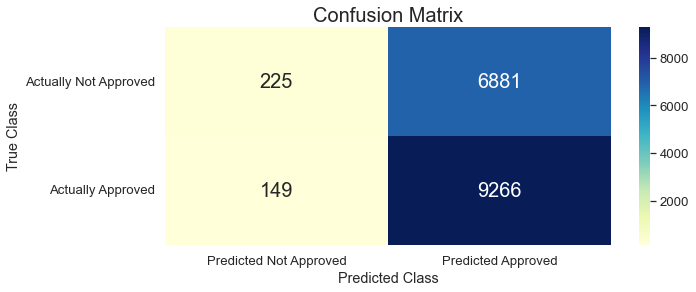

In [263]:
show_cmatrix(y_test_fi, y_pred_dt)